In [1]:
from numpy import square, power, cosh, sinh, linspace, sqrt, tanh, log10, log
from scipy.constants import hbar, c, pi
import matplotlib.pyplot as plt

In [2]:
# carrier laser wavelength
wavelength = 0.000001064 # m
omega_0 = 2*pi*c / wavelength
# SRM power transmissivity
T_srm = 0.35

# ITM power transmissivity
T = 0.014

# Arm cavity initial length
L_arm_0 = 4000 # m

# Signal recycling cavity initial length
L_src_0 = 50 # m

# Detection bandwidth
gamma = 389 # Hz

# Mirror mass (ITM and ETM)
m = 40 # kg

# Intra cavity power
I_c = 650000 # W

# Idler detuning
Delta = -15300000 # Hz

# Squeezing factor of the OPA
r = 1.23 # 15dB

# Arm length tuning
delta_L_arm = 19850 * wavelength

# SRC length tuning
delta_L_src = 26 * wavelength

# Phase compensation
phi_c = 0.32 # rads

In [3]:
def h_sql_2(Omega, L):
    return 8 * hbar / (m * square(Omega) * square(L))

In [4]:
def Theta(L):
    return power(8 * omega_0 * I_c / (m * L * c), 1/3)

In [5]:
def Kappa(Omega, L):
    return 2 * power(Theta(L), 3) * gamma / (square(Omega) * (square(Omega) + square(gamma)))
    # return 16. * I_c * omega_0 / (m * power(c,2) * power(Omega,2))

In [6]:
def S_hh(Omega, L):
    return (h_sql_2(Omega, L) / (2*cosh(2*r))) * (Kappa(Omega, L) + 1/Kappa(Omega, L))

In [7]:
def Delta_S_hh_in(Omega, L, epsilon_in):
    return (h_sql_2(Omega, L) / (2*cosh(2*r))) * (Kappa(Omega, L) + 1/Kappa(Omega, L)) * (
        (2*cosh(2*square(r)) - cosh(2*r) - 1) / 
        cosh(2*r)
    ) * epsilon_in

def Delta_S_hh_r(Omega, L, epsilon_r):
    return h_sql_2(Omega, L) / 2 * (Kappa(Omega, L) * square(tanh(2*r)) + (1 + square(tanh(2*r)))/Kappa(Omega, L)) * epsilon_r

# def Delta_S_hh_cond(Omega, L, epsilon_in, epsilon_r):
#     return Delta_S_hh_in(Omega, L, epsilon_in) + Delta_S_hh_r(Omega, L, epsilon_r)

def Delta_S_hh_cond(Omega, L, epsilon):
    return h_sql_2(Omega, L) / 2 * (2/Kappa(Omega, L) + 3*Kappa(Omega, L)/2) * 2*epsilon

def Delta_S_hh_tran(Omega, L, epsilon):
    return h_sql_2(Omega, L) / 2 * (2/Kappa(Omega, L) + Kappa(Omega, L)) * epsilon

Text(0, 0.5, 'Strain Sensitivity (1/$\\sqrt{Hz}$)')

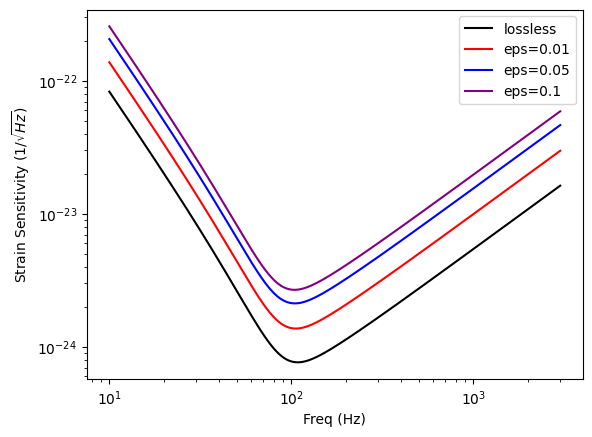

In [8]:
Omegas = linspace(10, 3000, 10000)
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) for o in Omegas], color="black", label="lossless")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_cond(2*pi*o, L_arm_0, 0.01)) + sqrt(Delta_S_hh_tran(2*pi*o, L_arm_0, 0.01)) for o in Omegas], color="red", label="eps=0.01")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_cond(2*pi*o, L_arm_0, 0.05)) + sqrt(Delta_S_hh_tran(2*pi*o, L_arm_0, 0.05)) for o in Omegas], color="blue", label="eps=0.05")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_cond(2*pi*o, L_arm_0, 0.1)) + sqrt(Delta_S_hh_tran(2*pi*o, L_arm_0, 0.1)) for o in Omegas], color="purple", label="eps=0.1")

plt.legend()
plt.xlabel("Freq (Hz)")
plt.ylabel("Strain Sensitivity (1/$\sqrt{Hz}$)")

Text(0.5, 1.0, 'Input Loss')

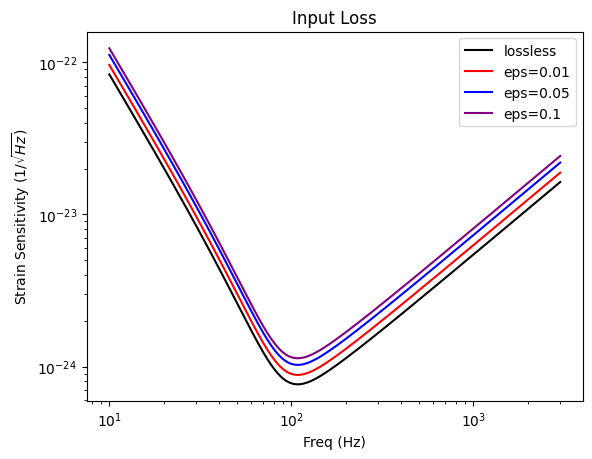

In [9]:
Omegas = linspace(10, 3000, 10000)
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) for o in Omegas], color="black", label="lossless")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_in(2*pi*o, L_arm_0, 0.01)) for o in Omegas], color="red", label="eps=0.01")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_in(2*pi*o, L_arm_0, 0.05)) for o in Omegas], color="blue", label="eps=0.05")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_in(2*pi*o, L_arm_0, 0.1)) for o in Omegas], color="purple", label="eps=0.1")

plt.legend()
plt.xlabel("Freq (Hz)")
plt.ylabel("Strain Sensitivity (1/$\sqrt{Hz}$)")
plt.title("Input Loss")

Text(0.5, 1.0, 'Readout Loss')

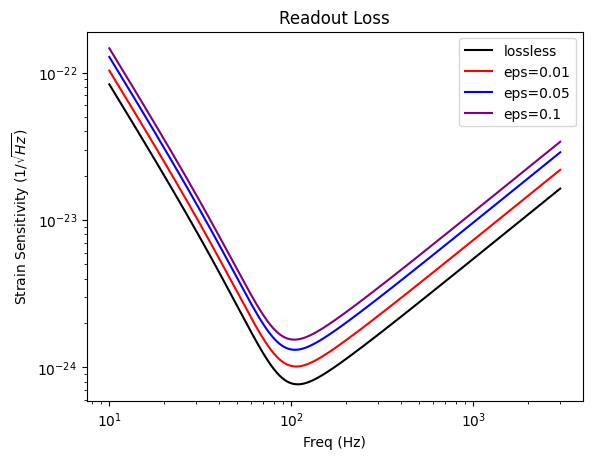

In [10]:
Omegas = linspace(10, 3000, 10000)
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) for o in Omegas], color="black", label="lossless")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_r(2*pi*o, L_arm_0, 0.01)) for o in Omegas], color="red", label="eps=0.01")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_r(2*pi*o, L_arm_0, 0.05)) for o in Omegas], color="blue", label="eps=0.05")
plt.loglog(Omegas, [sqrt(S_hh(2*pi*o, L_arm_0)) + sqrt(Delta_S_hh_r(2*pi*o, L_arm_0, 0.1)) for o in Omegas], color="purple", label="eps=0.1")

plt.legend()
plt.xlabel("Freq (Hz)")
plt.ylabel("Strain Sensitivity (1/$\sqrt{Hz}$)")
plt.title("Readout Loss")